In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
df = pd.read_csv('data/data_train.csv', usecols = [
       'SALE PRICE','SALE DATE', 'histdist', 'landmark', 'landuse', 'YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'FELONY', 'VIOLATION', 'MISDEMEANOR',
       'Num of SAT Test Takers', 'satReadingSum', 'satMathSum',
       'satWritingSum'])
print(df.shape)
df.head()

(8885, 61)


,SALE PRICE,SALE DATE,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,easements,lotarea,...,FELONY,VIOLATION,MISDEMEANOR,Num of SAT Test Takers,satReadingSum,satMathSum,satWritingSum,histdist,landmark,landuse
0,3750000,2018-08-01 00:00:00,110,3,0,3,2018,3354,0.0,2018.0,...,462.0,195.0,869.0,3825,498.0,525.0,496.0,Mount Morris Park Historic District,NaN,2.0
1,5000000,2018-10-25 00:00:00,119,26,4,30,5060,20310,0.0,5060.0,...,306.0,156.0,677.0,4005,441.0,487.0,442.0,NaN,NaN,4.0
2,5000000,2018-10-25 00:00:00,119,26,4,30,5060,20310,0.0,5060.0,...,303.0,156.0,672.0,4005,441.0,487.0,442.0,NaN,NaN,4.0
3,29100000,2018-10-22 00:00:00,99,26,1,27,4642,27141,0.0,4642.0,...,509.0,266.0,897.0,3825,498.0,525.0,496.0,NaN,NaN,4.0
4,2350000,2019-02-11 00:00:00,116,0,0,0,0,0,0.0,10013.0,...,102.0,21.0,83.0,9100,451.0,476.0,447.0,Upper East Side Historic District,NaN,3.0


# Preprocessing

## Cleaning

### Extremum filter

In [3]:
sale_price = sorted(df['SALE PRICE'])

In [4]:
# percent_right = 0.9973 # 3 std
percent_right = 0.9545 # 2 std
percent_left = len(list(filter(lambda x: x<200000, sale_price)))/len(sale_price)
percent_left

0.03421496904895892

In [5]:
price_left = sale_price[int(len(sale_price) * percent_left)]
price_right = sale_price[int(len(sale_price) * percent_right)]

In [6]:
df = df.fillna(0) # fillna

# df = df[(df['SALE PRICE'] > price_left) & (df['SALE PRICE'] < price_right)]
df = df[df['SALE PRICE'] > price_left]
# df = df[df['SALE PRICE'] < price_right]

print(df.shape)
df.head()

(8577, 61)


,SALE PRICE,SALE DATE,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,easements,lotarea,...,FELONY,VIOLATION,MISDEMEANOR,Num of SAT Test Takers,satReadingSum,satMathSum,satWritingSum,histdist,landmark,landuse
0,3750000,2018-08-01 00:00:00,110,3,0,3,2018,3354,0.0,2018.0,...,462.0,195.0,869.0,3825,498.0,525.0,496.0,Mount Morris Park Historic District,0,2.0
1,5000000,2018-10-25 00:00:00,119,26,4,30,5060,20310,0.0,5060.0,...,306.0,156.0,677.0,4005,441.0,487.0,442.0,0,0,4.0
2,5000000,2018-10-25 00:00:00,119,26,4,30,5060,20310,0.0,5060.0,...,303.0,156.0,672.0,4005,441.0,487.0,442.0,0,0,4.0
3,29100000,2018-10-22 00:00:00,99,26,1,27,4642,27141,0.0,4642.0,...,509.0,266.0,897.0,3825,498.0,525.0,496.0,0,0,4.0
4,2350000,2019-02-11 00:00:00,116,0,0,0,0,0,0.0,10013.0,...,102.0,21.0,83.0,9100,451.0,476.0,447.0,Upper East Side Historic District,0,3.0


### Numeric & Categoric split

In [7]:
numeric_list = ['YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'FELONY', 'VIOLATION', 'MISDEMEANOR',
       'Num of SAT Test Takers', 'satReadingSum', 'satMathSum',
       'satWritingSum']

categoric_list = ['histdist', 'landmark', 'landuse']

In [8]:
Y = df[['SALE PRICE']]
X = df[numeric_list]

## Standardize


### method 1
https://blog.csdn.net/FrankieHello/article/details/79659111

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()
std_data = ss.fit_transform(df[numeric_list])
origin_data = ss.inverse_transform(std_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### method 2
https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

In [11]:
def standardize(df):
    return (df-df.mean())/df.std()

In [12]:
def standardize_inverse(df, mean, std):
    return std * df + mean

In [13]:
temp = standardize(df['YEAR BUILT'])
temp.head()

0    0.538397
1    0.708449
2    0.708449
3    0.330556
4    0.651765
Name: YEAR BUILT, dtype: float64

In [14]:
mean, std = df['YEAR BUILT'].mean(), df['YEAR BUILT'].std()

In [15]:
standardize_inverse(temp, mean, std).head()

0    110.0
1    119.0
2    119.0
3     99.0
4    116.0
Name: YEAR BUILT, dtype: float64

In [19]:
X_standardized = X.apply(standardize)
Y_standardized = Y.apply(standardize)

## Train & Test split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [37]:
X_standardized_train, X_standardized_test, Y_standardized_train, Y_standardized_test = \
train_test_split(X_standardized, Y_standardized, test_size=0.33, random_state=42)

## Whitening

http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

## PCA

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/  
https://stackoverflow.com/questions/26182329/how-do-i-convert-new-data-into-the-pca-components-of-my-training-data

n_components：  
默认值为保留所有特征值维度，即不进行主成分降维；  
取大于等于1的整数时，即指定我们希望降维后的维数；  
取0-1的浮点数时，即指定降维后的方差和占比，比例越大，保留的信息越多。系统会自行计算保留的维度个数。  
https://blog.csdn.net/Genius9_9/article/details/81098840  

所以在实际使用PCA时，我们不需要选择k，而是直接设置n_components为float数据。  
https://blog.csdn.net/ybdesire/article/details/64546435

In [23]:
from sklearn.decomposition import PCA

### method 1

In [25]:
n = 56 # how many eigenvectors we choose
pca = PCA(n,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance

pca.fit(X_standardized_train) #fit the model to the data

PCA(copy=True, iterated_power='auto', n_components=56, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [26]:
# X_train_numeric = pca.transform(X_train_numeric) #find principal components

Text(0, 0.5, 'variance')

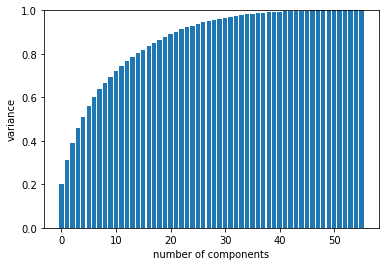

In [27]:
#Plot explained variance per number of leading PC's to choose
eigenvalues = pca.explained_variance_
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.ylim(0,1)
# plt.xlim(0,n)
plt.xlabel('number of components')
plt.ylabel('variance')

In [29]:
p=0.8
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 15 PCs to explain 80.00 percent of variance


In [30]:
p=0.9
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 22 PCs to explain 90.00 percent of variance


In [32]:
p=0.95
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 28 PCs to explain 95.00 percent of variance


### method 2

In [34]:
p=0.8
pca = PCA(p,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance

pca.fit(X_standardized_train) #fit the model to the data
eigenvalues = pca.explained_variance_

X_standardized_train_PCA = pca.transform(X_standardized_train) #find principal components
n = X_standardized_train_PCA.shape[1] # how many eigenvectors we choose

print("we need %d PCs to explain %.2f percent of variance"%(n,100*p))

we need 15 PCs to explain 80.00 percent of variance


In [35]:
pd.DataFrame(X_standardized_train_PCA).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000e+00,6.571960e-17,-1.270428e-16,-1.418457e-17,2.427224e-17,-1.608809e-17,-9.511780e-17,7.599085e-17,3.859112e-16,6.619934e-16,2.244506e-16,-2.722233e-16,-4.851163e-16,2.704538e-16,-2.024780e-16
1,6.571960e-17,1.000000e+00,9.546565e-17,-2.537377e-17,4.280494e-18,-3.851962e-17,-1.265693e-16,3.302346e-17,3.299387e-17,2.469449e-16,1.587696e-16,4.779593e-17,-2.311274e-17,1.340771e-16,-2.856723e-17
2,-1.270428e-16,9.546565e-17,1.000000e+00,-1.399905e-16,6.669841e-16,1.419520e-16,1.746210e-16,4.362529e-16,3.273998e-16,4.429297e-17,-2.457371e-16,1.421163e-16,5.165581e-17,-1.950089e-16,-1.835202e-16
3,-1.418457e-17,-2.537377e-17,-1.399905e-16,1.000000e+00,-2.376476e-15,-5.623584e-17,-3.277525e-17,-1.135998e-16,-2.214697e-16,-1.373333e-16,5.221623e-17,2.023464e-16,-9.127212e-17,4.750093e-17,1.517015e-17
4,2.427224e-17,4.280494e-18,6.669841e-16,-2.376476e-15,1.000000e+00,-1.941006e-16,-1.476432e-17,-1.690940e-17,9.720491e-18,-3.107368e-16,-3.383426e-16,1.154260e-16,-3.884331e-16,-1.087999e-16,1.523392e-16
5,-1.608809e-17,-3.851962e-17,1.419520e-16,-5.623584e-17,-1.941006e-16,1.000000e+00,-2.558827e-16,8.262695e-16,-1.875132e-16,-1.902887e-16,1.188441e-16,-1.129210e-16,-2.087103e-17,2.207015e-16,-1.809789e-16
6,-9.511780e-17,-1.265693e-16,1.746210e-16,-3.277525e-17,-1.476432e-17,-2.558827e-16,1.000000e+00,4.617789e-16,7.054989e-16,-2.963107e-16,-5.551888e-16,-1.887693e-17,-8.242126e-17,5.273414e-16,-3.284482e-16
7,7.599085e-17,3.302346e-17,4.362529e-16,-1.135998e-16,-1.690940e-17,8.262695e-16,4.617789e-16,1.000000e+00,-7.818364e-17,-2.120312e-16,1.994947e-17,1.496754e-16,-5.092387e-17,2.631055e-16,-2.518728e-16
8,3.859112e-16,3.299387e-17,3.273998e-16,-2.214697e-16,9.720491e-18,-1.875132e-16,7.054989e-16,-7.818364e-17,1.000000e+00,1.213286e-16,-6.488452e-16,1.342498e-16,-3.303904e-16,1.196171e-16,-3.657335e-16
9,6.619934e-16,2.469449e-16,4.429297e-17,-1.373333e-16,-3.107368e-16,-1.902887e-16,-2.963107e-16,-2.120312e-16,1.213286e-16,1.000000e+00,2.063962e-16,1.403266e-16,4.324942e-17,2.001204e-16,-2.375288e-16


In [38]:
X_standardized_test_PCA = pca.transform(X_standardized_test)  #Don't use fit_transform, just apply the pca we learned before
pd.DataFrame(X_standardized_test_PCA).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.032484,-0.011855,-0.016388,0.011646,-0.001958,-0.057658,-0.045914,0.061118,0.125295,0.080324,0.004207,-0.020274,0.030128,0.021104
1,-0.032484,1.000000,-0.007853,0.031909,0.036343,-0.005177,-0.031426,0.033853,-0.014317,0.025135,-0.005725,-0.012135,0.001378,0.017692,0.002373
2,-0.011855,-0.007853,1.000000,-0.267025,0.023822,-0.146861,0.052446,-0.154448,0.043617,-0.101097,-0.034820,-0.068509,-0.068415,0.002587,-0.215841
3,-0.016388,0.031909,-0.267025,1.000000,0.049978,-0.108513,0.020521,-0.032270,-0.039766,0.027376,-0.008744,-0.029805,0.017982,-0.008779,-0.095671
4,0.011646,0.036343,0.023822,0.049978,1.000000,0.021598,0.028349,0.126176,0.018216,-0.018671,0.045933,-0.066760,0.114228,0.056731,0.043526
5,-0.001958,-0.005177,-0.146861,-0.108513,0.021598,1.000000,0.046863,-0.169368,-0.157646,0.076323,-0.037351,-0.083152,0.027375,-0.005042,-0.034070
6,-0.057658,-0.031426,0.052446,0.020521,0.028349,0.046863,1.000000,-0.034082,0.038080,-0.110931,0.071675,0.010829,0.058225,0.001365,0.003548
7,-0.045914,0.033853,-0.154448,-0.032270,0.126176,-0.169368,-0.034082,1.000000,-0.186080,-0.021755,0.044446,0.186807,0.179711,-0.033400,-0.126663
8,0.061118,-0.014317,0.043617,-0.039766,0.018216,-0.157646,0.038080,-0.186080,1.000000,0.580804,-0.173970,0.110443,0.051269,-0.069023,0.078781
9,0.125295,0.025135,-0.101097,0.027376,-0.018671,0.076323,-0.110931,-0.021755,0.580804,1.000000,0.071371,0.343088,-0.135080,-0.049202,-0.084015


# Modeling

## Multivariate linear regression model

In [40]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

### original

In [42]:
mod = sm.OLS(Y_train, X_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     236.3
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        21:13:36   Log-Likelihood:            -1.0366e+05
No. Observations:                5746   AIC:                         2.074e+05
Df Residuals:                    5691   BIC:                         2.078e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT              4.004e+04   4918.744      8.141      0.000    3.04e+04    4.97e+04
RESIDENTIAL UNITS      -3.318e+05   3.28e+04    -10.113      0.000   -3.96e+05   -2.68e+05
COMMERCIAL UNITS        5.311e+05   5.72e+04      9.289      0.000    4.19e+05    6.43e+05
TOTAL UNITS             1.992e+05    3.2e+04      6.220      0.000    1.36e+05    2.62e+05
LAND SQUARE FEET        -884.1794    124.171     -7.121      0.000   -1127.601    -640.757
GROSS SQUARE FEET        781.0013     25.934     30.115      0.000     730.161     831.842
easements                1.64e+06    2.7e+06      0.608      0.543   -3.65e+06    6.93e+06
lotarea                  -20.7822     21.145     -0.983      0.326     -62.234      20.669
bldgarea                -221.3254     32.584     -6.792      0.000    -285.203    -157.448
comarea                  140.3463     44.510      3.153      0.002      53.090     227.603
resarea                  204.0289     31.744      6.427      0.000     141.798     266.260
officearea              -134.0100     41.172     -3.255      0.001    -214.722     -53.298
retailarea               400.1069     37.742     10.601      0.000     326.118     474.096
garagearea                59.5056     51.107      1.164      0.244     -40.684     159.696
strgearea               -496.0861     98.581     -5.032      0.000    -689.342    -302.830
factryarea               178.8001     47.847      3.737      0.000      85.002     272.598
otherarea                376.7788     63.150      5.966      0.000     252.981     500.576
numbldgs                -2.01e+04   1.16e+05     -0.173      0.863   -2.48e+05    2.07e+05
numfloors              -9.507e+04    7.6e+04     -1.250      0.211   -2.44e+05     5.4e+04
unitsres                4.054e+05   8.32e+04      4.871      0.000    2.42e+05    5.69e+05
unitstotal             -4.176e+05   8.31e+04     -5.028      0.000    -5.8e+05   -2.55e+05
lotfront                1.751e+04   5869.855      2.982      0.003    5999.398     2.9e+04
lotdepth               -4666.8341   3930.766     -1.187      0.235   -1.24e+04    3038.964
bldgfront               3667.9334   3995.214      0.918      0.359   -4164.209    1.15e+04
bldgdepth              -2097.3304   3455.622     -0.607      0.544   -8871.666    4677.005
assessland                 1.9450      0.203      9.580      0.000       1.547       2.343
assesstot                 -0.0979      0.068     -1.447      0.148      -0.230       0.035
exemptland                 3.2017      0.963      3.325      0.001       1.314       5.090
exempttot                 -0.4039      0.086     -4.682      0.000      -0.573      -0.235
builtfar                -3.45e+05   1.29e+05     -2.665      0.008   -5.99e+05   -9.12e+04
residfar                6.548e+05   1.82e+05      3.597      0.000    2.98e+05  

In [43]:
# predict out of sample
# http://www.statsmodels.org/0.6.1/examples/notebooks/generated/predict.html

In [45]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_test)
r2_score(Y_test, Y_pred)

0.7342834380539907

### log

In [58]:
mod = sm.OLS(np.log(Y_train), X_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.314e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        21:16:26   Log-Likelihood:                -6732.0
No. Observations:                5746   AIC:                         1.357e+04
Df Residuals:                    5691   BIC:                         1.394e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0013      0.000      5.796      0.000       0.001       0.002
RESIDENTIAL UNITS          0.0017      0.002      1.112      0.266      -0.001       0.005
COMMERCIAL UNITS           0.0122      0.003      4.508      0.000       0.007       0.017
TOTAL UNITS                0.0139      0.002      9.186      0.000       0.011       0.017
LAND SQUARE FEET        9.706e-05   5.87e-06     16.547      0.000    8.56e-05       0.000
GROSS SQUARE FEET       -2.11e-06   1.23e-06     -1.722      0.085   -4.51e-06    2.92e-07
easements                  0.3757      0.127      2.948      0.003       0.126       0.625
lotarea                 6.443e-06   9.99e-07      6.450      0.000    4.48e-06     8.4e-06
bldgarea                2.218e-06   1.54e-06      1.441      0.150      -8e-07    5.24e-06
comarea                -8.441e-06    2.1e-06     -4.014      0.000   -1.26e-05   -4.32e-06
resarea                -1.699e-06    1.5e-06     -1.133      0.257   -4.64e-06    1.24e-06
officearea              4.801e-06   1.95e-06      2.469      0.014    9.88e-07    8.61e-06
retailarea              7.761e-06   1.78e-06      4.353      0.000    4.27e-06    1.13e-05
garagearea              4.712e-06   2.41e-06      1.952      0.051   -2.12e-08    9.45e-06
strgearea               2.405e-05   4.66e-06      5.164      0.000    1.49e-05    3.32e-05
factryarea             -3.344e-06   2.26e-06     -1.479      0.139   -7.78e-06    1.09e-06
otherarea               1.983e-05   2.98e-06      6.648      0.000     1.4e-05    2.57e-05
numbldgs                  -0.0049      0.005     -0.893      0.372      -0.016       0.006
numfloors                 -0.0143      0.004     -3.984      0.000      -0.021      -0.007
unitsres                   0.0104      0.004      2.648      0.008       0.003       0.018
unitstotal                -0.0144      0.004     -3.672      0.000      -0.022      -0.007
lotfront                  -0.0008      0.000     -2.952      0.003      -0.001      -0.000
lotdepth                  -0.0015      0.000     -7.827      0.000      -0.002      -0.001
bldgfront                 -0.0008      0.000     -4.173      0.000      -0.001      -0.000
bldgdepth                  0.0005      0.000      3.222      0.001       0.000       0.001
assessland              2.802e-08   9.59e-09      2.921      0.003    9.22e-09    4.68e-08
assesstot               2.082e-08    3.2e-09      6.518      0.000    1.46e-08    2.71e-08
exemptland              2.059e-07   4.55e-08      4.526      0.000    1.17e-07    2.95e-07
exempttot              -2.373e-08   4.08e-09     -5.823      0.000   -3.17e-08   -1.57e-08
builtfar                  -0.0136      0.006     -2.220      0.026      -0.026      -0.002
residfar                  -0.0172      0.009     -2.003      0.045      -0.034  

In [59]:
Y_pred =  mod.predict(X_test) 
r2_score(np.log(Y_test), Y_pred)

0.4173061035084664

### stardardized

In [63]:
mod = sm.OLS(Y_standardized_train, X_standardized_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     229.8
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        21:19:31   Log-Likelihood:                -4873.5
No. Observations:                5746   AIC:                             9857.
Df Residuals:                    5691   BIC:                         1.022e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0725      0.009      8.151      0.000       0.055       0.090
RESIDENTIAL UNITS         -0.0755      0.009     -8.092      0.000      -0.094      -0.057
COMMERCIAL UNITS           0.1801      0.019      9.337      0.000       0.142       0.218
TOTAL UNITS                0.0190      0.009      2.161      0.031       0.002       0.036
LAND SQUARE FEET          -0.1134      0.016     -7.267      0.000      -0.144      -0.083
GROSS SQUARE FEET          0.9063      0.030     29.894      0.000       0.847       0.966
easements                  0.0044      0.008      0.535      0.593      -0.012       0.021
lotarea                   -0.0671      0.081     -0.826      0.409      -0.227       0.092
bldgarea                  -4.0106      0.602     -6.664      0.000      -5.191      -2.831
comarea                    0.3487      0.117      2.987      0.003       0.120       0.578
resarea                    3.2244      0.514      6.276      0.000       2.217       4.232
officearea                -0.0913      0.030     -3.050      0.002      -0.150      -0.033
retailarea                 0.2783      0.026     10.828      0.000       0.228       0.329
garagearea                 0.0672      0.055      1.230      0.219      -0.040       0.174
strgearea                 -0.0367      0.007     -5.011      0.000      -0.051      -0.022
factryarea                 0.0556      0.014      3.943      0.000       0.028       0.083
otherarea                  0.0598      0.010      6.125      0.000       0.041       0.079
numbldgs                  -0.0042      0.014     -0.297      0.766      -0.032       0.024
numfloors                 -0.0249      0.021     -1.187      0.235      -0.066       0.016
unitsres                   5.9305      1.171      5.063      0.000       3.634       8.227
unitstotal                -6.1482      1.177     -5.224      0.000      -8.456      -3.841
lotfront                   0.1314      0.045      2.925      0.003       0.043       0.219
lotdepth                  -0.0267      0.020     -1.369      0.171      -0.065       0.012
bldgfront                  0.0208      0.020      1.029      0.303      -0.019       0.060
bldgdepth                 -0.0122      0.018     -0.667      0.505      -0.048       0.024
assessland                 0.5228      0.055      9.564      0.000       0.416       0.630
assesstot                 -0.1136      0.081     -1.396      0.163      -0.273       0.046
exemptland                 0.2171      0.064      3.400      0.001       0.092       0.342
exempttot                 -0.0613      0.013     -4.760      0.000      -0.087      -0.036
builtfar                  -0.0551      0.020     -2.756      0.006      -0.094      -0.016
residfar                   0.0620      0.018      3.456      0.001       0.027  

In [64]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_standardized_test)
r2_score(Y_standardized_test, Y_pred)

0.734572147378015

### feature selection

In [67]:
mod = sm.OLS(Y_standardized_train, X_standardized_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     229.8
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        21:22:31   Log-Likelihood:                -4873.5
No. Observations:                5746   AIC:                             9857.
Df Residuals:                    5691   BIC:                         1.022e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0725      0.009      8.151      0.000       0.055       0.090
RESIDENTIAL UNITS         -0.0755      0.009     -8.092      0.000      -0.094      -0.057
COMMERCIAL UNITS           0.1801      0.019      9.337      0.000       0.142       0.218
TOTAL UNITS                0.0190      0.009      2.161      0.031       0.002       0.036
LAND SQUARE FEET          -0.1134      0.016     -7.267      0.000      -0.144      -0.083
GROSS SQUARE FEET          0.9063      0.030     29.894      0.000       0.847       0.966
easements                  0.0044      0.008      0.535      0.593      -0.012       0.021
lotarea                   -0.0671      0.081     -0.826      0.409      -0.227       0.092
bldgarea                  -4.0106      0.602     -6.664      0.000      -5.191      -2.831
comarea                    0.3487      0.117      2.987      0.003       0.120       0.578
resarea                    3.2244      0.514      6.276      0.000       2.217       4.232
officearea                -0.0913      0.030     -3.050      0.002      -0.150      -0.033
retailarea                 0.2783      0.026     10.828      0.000       0.228       0.329
garagearea                 0.0672      0.055      1.230      0.219      -0.040       0.174
strgearea                 -0.0367      0.007     -5.011      0.000      -0.051      -0.022
factryarea                 0.0556      0.014      3.943      0.000       0.028       0.083
otherarea                  0.0598      0.010      6.125      0.000       0.041       0.079
numbldgs                  -0.0042      0.014     -0.297      0.766      -0.032       0.024
numfloors                 -0.0249      0.021     -1.187      0.235      -0.066       0.016
unitsres                   5.9305      1.171      5.063      0.000       3.634       8.227
unitstotal                -6.1482      1.177     -5.224      0.000      -8.456      -3.841
lotfront                   0.1314      0.045      2.925      0.003       0.043       0.219
lotdepth                  -0.0267      0.020     -1.369      0.171      -0.065       0.012
bldgfront                  0.0208      0.020      1.029      0.303      -0.019       0.060
bldgdepth                 -0.0122      0.018     -0.667      0.505      -0.048       0.024
assessland                 0.5228      0.055      9.564      0.000       0.416       0.630
assesstot                 -0.1136      0.081     -1.396      0.163      -0.273       0.046
exemptland                 0.2171      0.064      3.400      0.001       0.092       0.342
exempttot                 -0.0613      0.013     -4.760      0.000      -0.087      -0.036
builtfar                  -0.0551      0.020     -2.756      0.006      -0.094      -0.016
residfar                   0.0620      0.018      3.456      0.001       0.027  

In [68]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_standardized_test)
r2_score(Y_standardized_test, Y_pred)

0.734572147378015

## Lasso
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [60]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(clf.coef_)
print(clf.intercept_) 
print(r2_score(Y_train, clf.predict(X_train)))
print(r2_score(Y_test, Y_pred))

[ 3.58543078e+04 -5.46219999e+04  3.13475881e+05 -3.06469486e+03
 -8.08015116e+02  7.06184603e+02  1.30325555e+06 -8.16702047e+01
 -3.19484776e+01  1.91959799e+01  3.83778255e+01 -9.91622047e+01
  3.66221845e+02  3.56175398e+01 -4.64263915e+02  1.92047193e+02
  3.94607035e+02 -6.22488828e+03 -1.25107097e+05  2.52704316e+03
 -1.68808557e+04  2.36443291e+04 -5.76385288e+03  1.29534832e+03
 -5.35983267e+02  1.77027852e+00 -2.73362452e-01  1.65047142e+00
 -2.67934433e-01 -3.93103834e+05  6.15940650e+05  2.96630815e+05
 -1.53060152e+05 -1.14754333e+08 -4.91043310e+01 -2.29168028e+05
 -2.16466249e+05 -1.78957091e+05 -2.14906455e+05 -4.78232286e+05
 -2.60055039e+05  2.48474805e+02  4.73204913e+05  5.89419709e+08
 -3.64347938e+08 -2.01147798e+04  5.01657902e+03 -1.50929276e+06
 -7.85212158e+08  4.85611857e+03 -4.29018361e+04  4.21265658e+03
  5.45704601e+02  2.76126991e+04  1.06609252e+04  7.11019155e+03]
[3249700.75485076]
0.6861309119848555
0.7331115433012818


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [62]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, np.log(Y_train))
Y_pred = clf.predict(X_test)
print(clf.coef_)
print(clf.intercept_)  
print(r2_score(np.log(Y_train), clf.predict(X_train)))
print(r2_score(np.log(Y_test), Y_pred))

[ 1.47279815e-03  4.53800820e-04  0.00000000e+00  1.23302278e-02
  1.04321519e-04 -1.05323667e-06  0.00000000e+00  7.23043299e-06
  5.11119756e-07 -4.05965493e-06  2.70342655e-07  1.06035483e-06
  5.87988281e-06  1.96327194e-06  1.95621196e-05 -8.36136774e-06
  1.63269192e-05 -0.00000000e+00 -7.07141538e-03 -3.30605290e-03
 -5.65882467e-04 -1.50789172e-03 -1.24651513e-03 -4.36507559e-04
  2.75229815e-04  3.71862740e-08  1.38862104e-08  1.47326024e-07
 -1.46982655e-08 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.61782621e-02 -0.00000000e+00  1.70573579e-06  4.07256500e-03
 -6.07358849e-03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.62624105e-05 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.16240687e-04  0.00000000e+00
 -0.00000000e+00  4.23849989e-04 -2.89274209e-03  3.59844124e-04
  2.88081379e-05  3.95948091e-03 -0.00000000e+00  0.00000000e+00]
[12.35089381]
0.44076511586511447
0.39973365826219076


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Ridge

## Decision Tree

## Random forest

## SVM

## Bayesian Methods

## Bayesian Networks

## Gaussian Processes

## Clustering